In [72]:
import pandas as pd
import numpy as np
# Load the dataset
LACrimedf = pd.read_csv('/content/Crime_Data_from_2020_to_Present (2).csv')
LACrimedf

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677900,231405429,02/05/2023 12:00:00 AM,02/05/2023 12:00:00 AM,1250,14,Pacific,1444,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,4300 LINCOLN BL,NaN,33.9846,-118.4428
677901,231104474,01/12/2023 12:00:00 AM,01/12/2023 12:00:00 AM,1240,11,Northeast,1107,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,1000 MILWAUKEE AV,NaN,34.1214,-118.1915
677902,230804266,01/08/2023 12:00:00 AM,01/08/2023 12:00:00 AM,1030,8,West LA,839,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,10200 SANTA MONICA BL,NaN,34.0611,-118.4184
677903,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054


In [73]:
# Remove all unwanted columns, we won't be using any of these 
# This also helps remove some NaN values
LACrimedf1 = LACrimedf.drop(columns = ['DR_NO', 'TIME OCC', 'Rpt Dist No', 'Part 1-2'])
LACrimedf2 = LACrimedf1.drop(columns = ['Crm Cd', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'])
LACrimedf3 = LACrimedf2.drop(columns = ['Mocodes', 'Premis Cd', 'Weapon Used Cd', 'Weapon Desc', 'LOCATION', 'Cross Street'])
LACrimedf4 = LACrimedf3.drop(columns = ['AREA', 'LAT', 'LON', 'Premis Desc', 'Status', 'Status Desc'])
LACrimedf4

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent
0,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B
1,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,Central,BATTERY - SIMPLE ASSAULT,25,M,H
2,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X
3,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W
4,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X
...,...,...,...,...,...,...,...
677900,02/05/2023 12:00:00 AM,02/05/2023 12:00:00 AM,Pacific,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,X,X
677901,01/12/2023 12:00:00 AM,01/12/2023 12:00:00 AM,Northeast,THEFT PLAIN - PETTY ($950 & UNDER),42,M,W
677902,01/08/2023 12:00:00 AM,01/08/2023 12:00:00 AM,West LA,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",48,M,O
677903,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H


In [74]:
# Already large dataset, remove all rows with NaN values
LACrimedf5 = LACrimedf4.dropna().reset_index(drop=True)
LACrimedf5

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent
0,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B
1,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,Central,BATTERY - SIMPLE ASSAULT,25,M,H
2,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X
3,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W
4,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X
...,...,...,...,...,...,...,...
589065,02/05/2023 12:00:00 AM,02/05/2023 12:00:00 AM,Pacific,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,X,X
589066,01/12/2023 12:00:00 AM,01/12/2023 12:00:00 AM,Northeast,THEFT PLAIN - PETTY ($950 & UNDER),42,M,W
589067,01/08/2023 12:00:00 AM,01/08/2023 12:00:00 AM,West LA,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",48,M,O
589068,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H


In [75]:
# Convert dates to datetime datatypes for Time Series Analysis later
LACrimedf5.dtypes
LACrimedf5["Date Rptd"] = LACrimedf4["Date Rptd"].astype("datetime64[ns]")
LACrimedf5["DATE OCC"] = LACrimedf4["Date Rptd"].astype("datetime64[ns]")
LACrimedf5.dtypes

Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
AREA NAME               object
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
dtype: object

In [76]:
# Create a new column for the victim's birth year using Age
def age(x):
   return 2023-x
LACrimedf5["Vict Birth Year"] = LACrimedf5["Vict Age"].apply(age)
LACrimedf5

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Vict Birth Year
0,2020-01-08,2020-01-08,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,1987
1,2020-01-02,2020-01-02,Central,BATTERY - SIMPLE ASSAULT,25,M,H,1998
2,2020-04-14,2020-04-14,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,2023
3,2020-01-01,2020-01-01,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,1947
4,2020-01-01,2020-01-01,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,1992
...,...,...,...,...,...,...,...,...
589065,2022-02-10,2022-02-10,Pacific,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,X,X,2023
589066,2022-05-24,2022-05-24,Northeast,THEFT PLAIN - PETTY ($950 & UNDER),42,M,W,1981
589067,2022-09-01,2022-09-01,West LA,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",48,M,O,1975
589068,2022-09-16,2022-09-16,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,2000


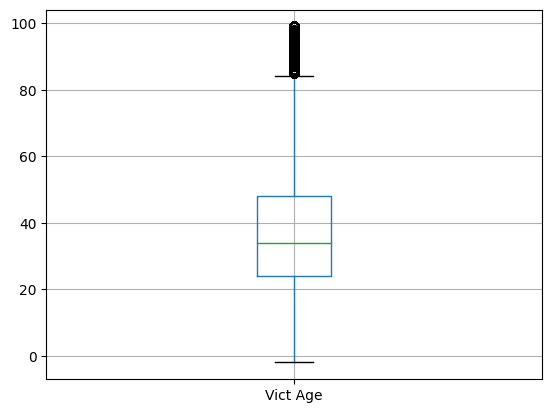

In [77]:
import matplotlib.pyplot as plt
Age_bplt = LACrimedf5.boxplot(column = ['Vict Age'])
Age_bplt.plot()
plt.show() #We have outliers in Vict Age!

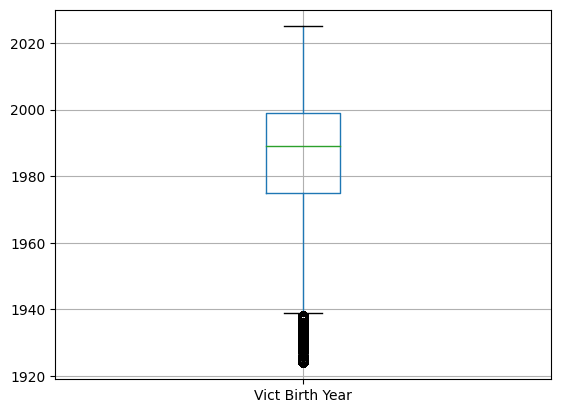

In [78]:
BYear_bplt = LACrimedf5.boxplot(column = ['Vict Birth Year'])
BYear_bplt.plot()
plt.show() #We have outliers in Vict Birth Year!

In [79]:
# To get rid of the rows with outliers we found in the birthyear and age columns, I looked at the boxplots we created and estimated where the upper 
# and lower fences were. I then dropped any rows where the value of age was more than the upper fence (estimate:81) and where the value of birthyear was
# less than the lower fence (estimate:1940)
LACrimedf5.drop(LACrimedf5[LACrimedf5['Vict Age'] > 81].index, inplace = True)
LACrimedf5.drop(LACrimedf5[LACrimedf5['Vict Birth Year'] < 1940].index, inplace = True)

In [80]:
# Check to see if we have invalid birth years or ages (We do!)
print(any(LACrimedf5['Vict Birth Year'] >= 2023))
print(any(LACrimedf5['Vict Age'] <= 0))

# Drop all rows with invalid ages and birth years
LACrimedf5.drop(LACrimedf5[LACrimedf5['Vict Age'] <= 0].index, inplace = True)
LACrimedf5.drop(LACrimedf5[LACrimedf5['Vict Birth Year'] >= 2023].index, inplace = True)

True
True


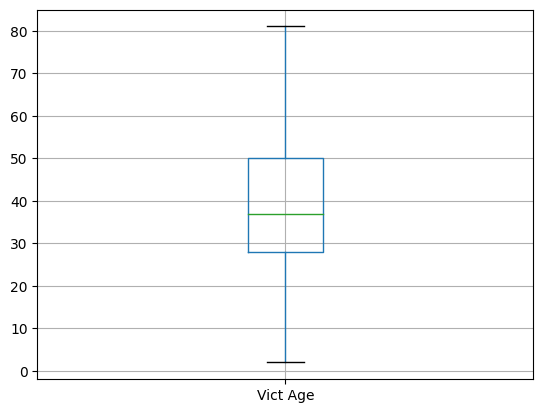

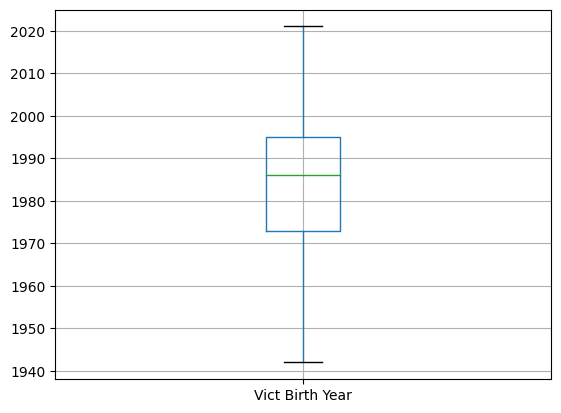

In [81]:
# I ran my boxplots again to see if I had any more outliers
Age_bplt = LACrimedf5.boxplot(column = ['Vict Age'])
Age_bplt.plot()
plt.show()

BYear_bplt = LACrimedf5.boxplot(column = ['Vict Birth Year'])
BYear_bplt.plot()
plt.show()

In [82]:
# MY FINAL CLEANED DATASET
LACrimedf5 = LACrimedf5.reset_index(drop = True) #resets the index number
LACrimedf5

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Vict Birth Year
0,2020-01-08,2020-01-08,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,1987
1,2020-01-02,2020-01-02,Central,BATTERY - SIMPLE ASSAULT,25,M,H,1998
2,2020-01-01,2020-01-01,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,1947
3,2020-01-01,2020-01-01,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,1992
4,2020-01-02,2020-01-02,Central,"RAPE, FORCIBLE",25,F,H,1998
...,...,...,...,...,...,...,...,...
509592,2022-03-19,2022-03-19,Hollenbeck,INTIMATE PARTNER - AGGRAVATED ASSAULT,41,F,H,1982
509593,2022-05-24,2022-05-24,Northeast,THEFT PLAIN - PETTY ($950 & UNDER),42,M,W,1981
509594,2022-09-01,2022-09-01,West LA,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",48,M,O,1975
509595,2022-09-16,2022-09-16,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,2000


In [83]:
# Area Name, Crm Cd Desc, Vict Descent, and Vict Birth Year are Nominal variables so mode is the central tendency
print(LACrimedf5['AREA NAME'].mode()) #Central
print(LACrimedf5['Crm Cd Desc'].mode()) #BATTERY - SIMPLE ASSAULT
print(LACrimedf5['Vict Sex'].mode()) #M
print(LACrimedf5['Vict Descent'].mode()) #H

0    Central
Name: AREA NAME, dtype: object
0    BATTERY - SIMPLE ASSAULT
Name: Crm Cd Desc, dtype: object
0    M
Name: Vict Sex, dtype: object
0    H
Name: Vict Descent, dtype: object


In [84]:
# Date Rptd, Date OCC, Vict Age, and Vict Birth Year are Interval variables so mean is the central tendency
print("The mean for Date Rptd is", LACrimedf5['Date Rptd'].mean())
print("The mean for DATE OCC is", LACrimedf5['DATE OCC'].mean())
print("The mean for Vict Age is", LACrimedf5['Vict Age'].mean())
print("The mean for Vict Birth Year is", LACrimedf5['Vict Birth Year'].mean())

The mean for Date Rptd is 2021-07-01 15:24:27.227632384
The mean for DATE OCC is 2021-07-01 15:24:27.227632384
The mean for Vict Age is 39.173360518213414
The mean for Vict Birth Year is 1983.8266394817865


In [85]:
# Area Name, Crm Cd Desc, Vict Descent, and Vict Birth Year are Nominal variables so the variation ratio is the measure of dispersion
ANFreqTable = LACrimedf5['AREA NAME'].value_counts() #calculates the frequency of each value in the column
ANFreq = ANFreqTable.values #gives an array of all of our frequencies
ANMode = ANFreq.max() #we found the mode previously, but this returns the max frequency which is the modal category
n1 = ANFreq.sum() #stores the sum of all the frequencies that were found from the column
pANMode = ANMode/n1 #to find the proportion of the modal category, we divide the frequency by the sum
ANVR = 1 - pANMode #finally, we subtract our value from 1
print("Variation ratio for AREA NAME is", ANVR)

CCDFreqTable = LACrimedf5['Crm Cd Desc'].value_counts() #same as before
CCDFreq = CCDFreqTable.values
CCDMode = CCDFreq.max()
n2 = CCDFreq.sum()
pCCDMode = CCDMode/n2
CCDVR = 1 - pCCDMode
print("Variation ratio for Crm Cd Desc is", CCDVR)

VSFreqTable = LACrimedf5['Vict Sex'].value_counts() #same as before
VSFreq = VSFreqTable.values
VSMode = VSFreq.max()
n3 = VSFreq.sum()
pVSMode = VSMode/n3
VSVR = 1 - pVSMode
print("Variation ratio for Vict Sex is", VSVR)

VDFreqTable = LACrimedf5['Vict Descent'].value_counts() #same as before
VDFreq = VDFreqTable.values
VDMode = VDFreq.max()
n4 = VDFreq.sum()
pVDMode = VDMode/n4
VDVR = 1 - pVDMode
print("Variation ratio for Vict Descent is", VDVR)

Variation ratio for AREA NAME is 0.929769994721319
Variation ratio for Crm Cd Desc is 0.8973306357768982
Variation ratio for Vict Sex is 0.4942650761287841
Variation ratio for Vict Descent is 0.5990164777265172


In [86]:
# Date Rptd, Date OCC, Vict Age, and Vict Birth Year are Interval variables so standard deviation is the measure of dispersion
print("\nThe standard deviation for Date Rptd is", LACrimedf5['Date Rptd'].std())
print("The standard deviation for DATE OCC is", LACrimedf5['DATE OCC'].std())
print("The standard deviation for Vict Age is", LACrimedf5['Vict Age'].std())
print("The standard deviation for Vict Birth Year is", LACrimedf5['Vict Birth Year'].std())


The standard deviation for Date Rptd is 313 days 04:45:31.491235160
The standard deviation for DATE OCC is 313 days 04:45:31.491235160
The standard deviation for Vict Age is 14.960653255980752
The standard deviation for Vict Birth Year is 14.960653255980752


In [87]:
# builds a correlation matrix and shows that victim age and birth year have a strong relationship, which makes sense
corr_matrix = LACrimedf5.corr().abs()
corr_matrix

<ipython-input-87-0bc463d14080>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = LACrimedf5.corr().abs()


,Vict Age,Vict Birth Year
Vict Age,1.0,1.0
Vict Birth Year,1.0,1.0


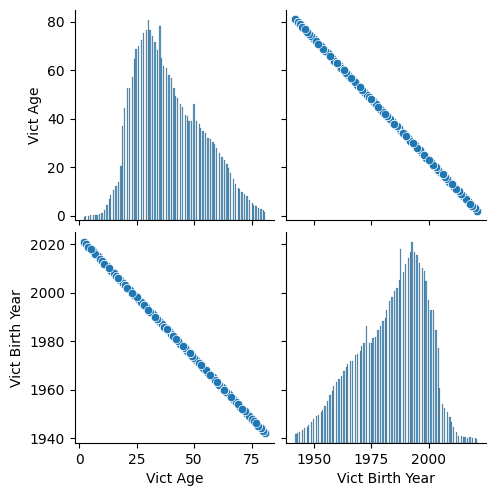

In [139]:
import seaborn as sns
sns.pairplot(LACrimedf5)
plt.show()

In [88]:
LACrimedf5.describe() # Gives count, mean, standard deviation, minimum, Q1, median, Q3, and maximum for victim birth year and victim age

,Vict Age,Vict Birth Year
count,509597.000000,509597.000000
mean,39.173361,1983.826639
std,14.960653,14.960653
min,2.000000,1942.000000
25%,28.000000,1973.000000
50%,37.000000,1986.000000
75%,50.000000,1995.000000
max,81.000000,2021.000000


Text(0, 0.5, 'Frequency')

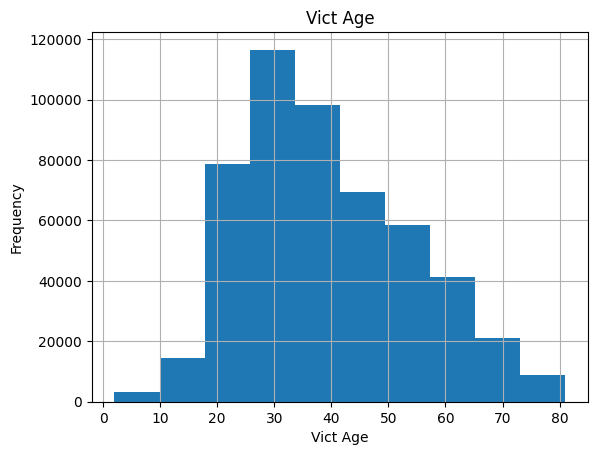

In [89]:
# One of our hypothesises was that young adults will be the most frequent victim for crime in LA
# We plot a histogram to see to which ages were the most frequent:
LACrimedf5.hist(column='Vict Age')
plt.xlabel("Vict Age")
plt.ylabel("Frequency")
# We can see that people in their late 30's seem to be the most frequent ages of victims for crime in LA.

<Axes: >

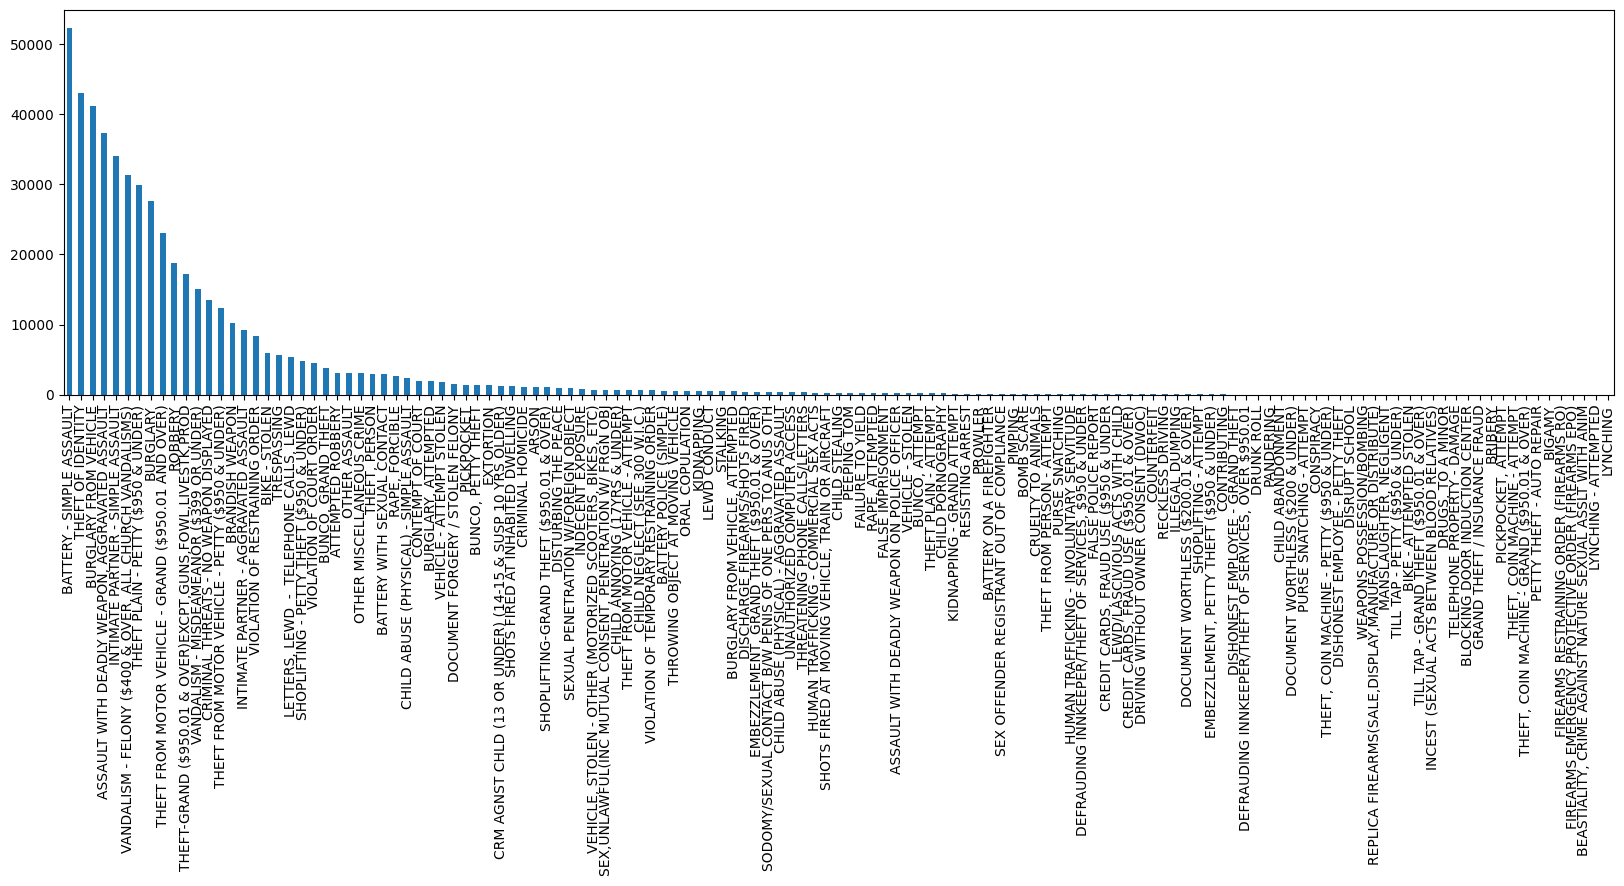

In [90]:
# Another hypothesis we had was that robberies and sexual assault would be the most frequent crimes in LA
# We plotted a barplot for the Crm Cd Desc variable to which crimes were the most frequent
plt.figure(figsize=(20, 5))
LACrimedf5['Crm Cd Desc'].value_counts().plot(kind='bar')
# We can see that Battery - Simple Assault and Identity Theft were the most frequent crimes in LA

In [113]:
MLdf = LACrimedf5.loc[LACrimedf5['Crm Cd Desc'] == 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)'] # new df where the crime was only burglarly
MLdf = MLdf.loc[LACrimedf5['DATE OCC'] < "2021-01-01"] #filter data when it falls off
# group by date and count the frequency
MLdf1 = MLdf.groupby('DATE OCC').count().reset_index()

# rename the count column
MLdf1 = MLdf1.rename(columns={'Crm Cd Desc': 'Frequency of Shoplifting Instances'})
MLdf2 = MLdf1.drop(columns = ['Date Rptd', 'AREA NAME', 'Vict Age',	'Vict Sex',	'Vict Descent',	'Vict Birth Year'])
MLdf2

#MLdf1 = MLdf.groupby(["DATE OCC"])["Crm Cd Desc"].count().reset_index(name="Number of Shoplifting Instances") #new df that gives 2 columns - the date and how many burglaries

#MLdf1.plot(x = "DATE OCC", y = "Number of Shoplifting Instances")

,DATE OCC,Frequency of Shoplifting Instances
0,2020-01-01,3
1,2020-01-02,6
2,2020-01-03,3
3,2020-01-04,2
4,2020-01-05,2
...,...,...
354,2020-12-27,3
355,2020-12-28,3
356,2020-12-29,4
357,2020-12-30,8


In [114]:
df = MLdf2.copy()
#df = df.rename(columns={'Number of Shoplifting Instances':'y'})
#df['DATE OCC']= to_datetime(df['DATE OCC'])
#df = df.rename(columns = {'DATE OCC': 'ds'})
#df.rename(columns = {'DATE OCC':'ds'}, inplace = True)
#df.rename(columns = {'Number of Shoplifting Instances':'y'}, inplace = True)
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
df

,ds,y
0,2020-01-01,3
1,2020-01-02,6
2,2020-01-03,3
3,2020-01-04,2
4,2020-01-05,2
...,...,...
354,2020-12-27,3
355,2020-12-28,3
356,2020-12-29,4
357,2020-12-30,8


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaqmq6jw_/7s8ga24e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaqmq6jw_/lhqgiy2i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49216', 'data', 'file=/tmp/tmpaqmq6jw_/7s8ga24e.json', 'init=/tmp/tmpaqmq6jw_/lhqgiy2i.json', 'output', 'file=/tmp/tmpaqmq6jw_/prophet_model1dwm1vq4/prophet_model-20230425050529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:05:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:05:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


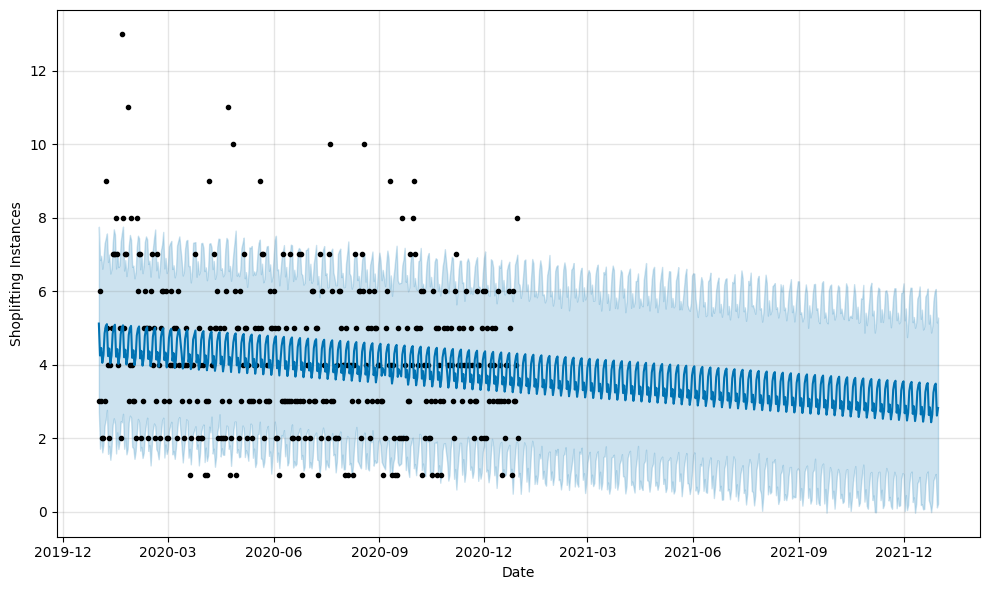

In [129]:
from pandas import to_datetime
from prophet import Prophet

# define the model
model = Prophet()
# fit the model
model.fit(df)

future = model.make_future_dataframe(periods=365)
#future.tail()

forecast2 = model.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

model.plot(forecast2, xlabel='Date', ylabel='Shoplifting Instances')

# Show the plot
plt.show()


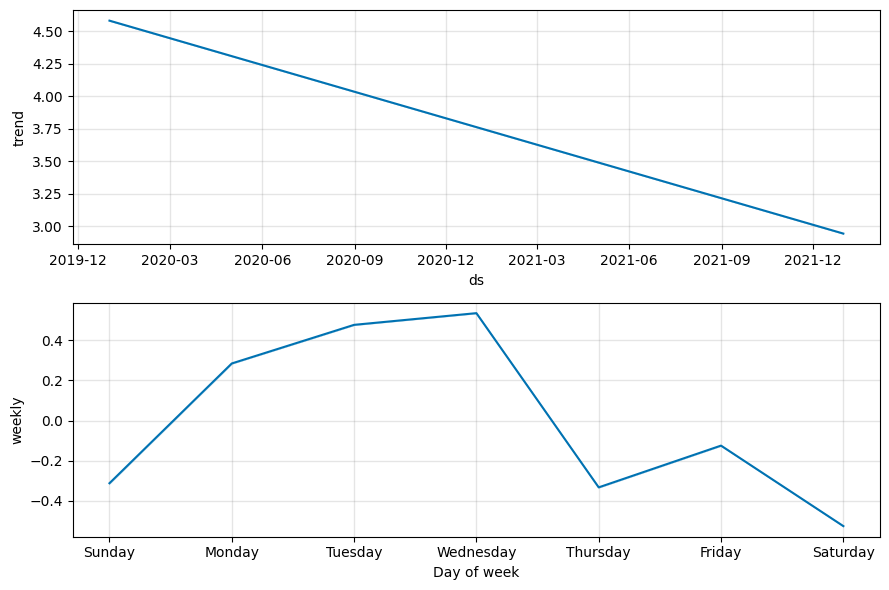

In [130]:
fig2 = model.plot_components(forecast2)

In [134]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R2
mse = mean_squared_error(df['y'], forecast2['yhat'][:len(df)])
r2 = r2_score(df['y'], forecast2['yhat'][:len(df)])

print("MSE: ", mse)
print("R2: ", r2)

MSE:  3.804124041460187
R2:  0.05545863033327103


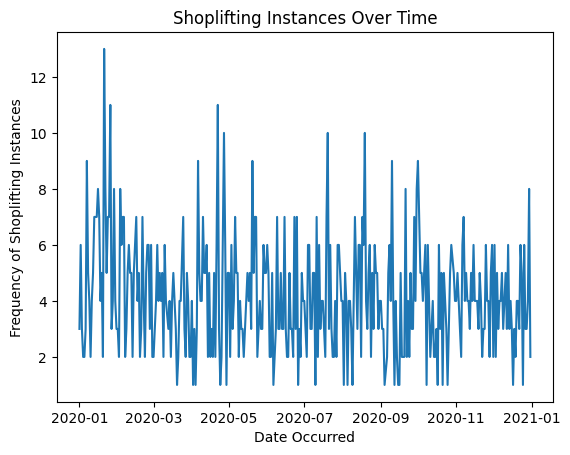

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


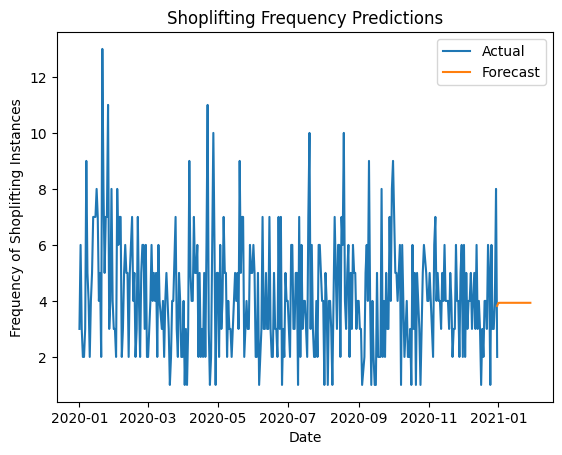

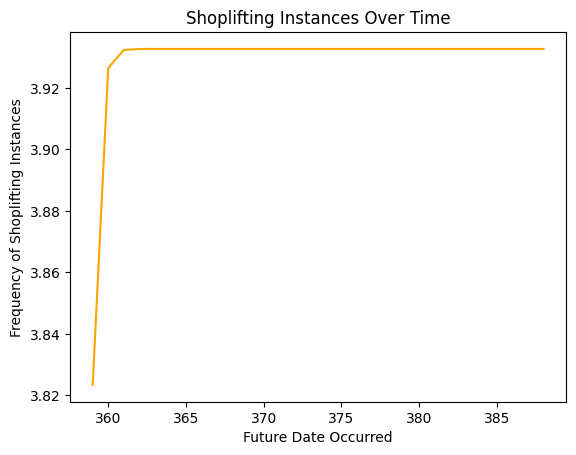

In [135]:
# ARIMA MODEL 

#MLdf2['DATE OCC'] = pd.to_datetime(MLdf2['DATE OCC'])

# Set the date column as the index
#MLdf2.set_index('DATE OCC', inplace=True)

#MLdf2.index = pd.DatetimeIndex(MLdf2.index)

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

# Load the dataset into a Pandas DataFrame

# Visualize the time series data
plt.plot(MLdf2)
plt.title('Shoplifting Instances Over Time')
plt.xlabel('Date Occurred')
plt.ylabel('Frequency of Shoplifting Instances')
plt.show()

# Fit an ARIMA model to the data
model = ARIMA(MLdf2, order=(1, 1, 1))
results = model.fit()

# Generate predictions for the next 30 days
predictions = pd.date_range(start=MLdf2.index[-1], periods=30, freq='D')
forecast = results.forecast(steps=30)

# Visualize the forecasted shoplisting frequencies
register_matplotlib_converters() # Required to fix date formatting issue
plt.plot(MLdf2.index, MLdf2['Frequency of Shoplifting Instances'], label='Actual')
plt.plot(predictions, forecast.values, label='Forecast')
plt.title('Shoplifting Frequency Predictions')
plt.xlabel('Date')
plt.ylabel('Frequency of Shoplifting Instances')
plt.legend()
plt.show()

#Visualize the forecast
plt.plot(forecast, color='orange')
plt.title('Shoplifting Instances Over Time')
plt.xlabel('Future Date Occurred')
plt.ylabel('Frequency of Shoplifting Instances')
plt.show()

In [136]:
# Evaluating ARIMA Model
import statsmodels.api as sm

mse2 = np.mean((results.resid)**2)
print("Mean Squared Error (MSE): ", mse2)

# Calculate the R-squared value
TSS = ((MLdf2 - MLdf2.mean()) ** 2).sum()
RSS = (results.resid ** 2).sum()
R2 = 1 - (RSS / TSS)
print("R-squared (R2): ", R2)

Mean Squared Error (MSE):  4.076842563392407
R-squared (R2):  Frequency of Shoplifting Instances   -0.012256
dtype: float64
